In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from scipy.stats import rankdata, norm
from sklearn.inspection import PartialDependenceDisplay

from xgboost import XGBRegressor

import warnings

In [12]:
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [3]:
y = df["Income"]
X = df.drop("Income", axis=1)

In [4]:
X = pd.get_dummies(df, columns=["Occupation", "Location", "Marital_Status", "Employment_Status",
                   "Homeownership_Status", "Type_of_Housing", "Gender", "Primary_Mode_of_Transportation"], dtype="int8")

In [5]:
X["Education_Level"] = X["Education_Level"].replace({"High School":0,
                                                        "Bachelor's":1,
                                                        "Master's":2,
                                                        "Doctorate":3})

/tmp/ipykernel_13006/1838980933.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["Education_Level"] = X["Education_Level"].replace({"High School":0,


In [6]:
X["Age_rank"] = rankdata(X["Age"])
X["Age_rank_norm"] = norm.ppf((X['Age_rank'] - 0.5) / len(X['Age_rank']))

X["Work_Experience_rank"] = rankdata(X["Work_Experience"])
X["Work_Experience_rank_norm"] = norm.ppf((X["Work_Experience_rank"] - 0.5) / len(X["Work_Experience_rank"]))

In [7]:
X.drop(["Age", "Work_Experience", "Age_rank", "Work_Experience_rank"], axis=1, inplace=True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [9]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:1305277.32009
[1]	validation_0-rmse:920196.25580
[2]	validation_0-rmse:650687.86252
[3]	validation_0-rmse:458496.90433
[4]	validation_0-rmse:325832.80609
[5]	validation_0-rmse:231897.78871
[6]	validation_0-rmse:166685.81347
[7]	validation_0-rmse:121418.81628
[8]	validation_0-rmse:91046.56867
[9]	validation_0-rmse:70393.42784
[10]	validation_0-rmse:57305.68048
[11]	validation_0-rmse:48537.26727
[12]	validation_0-rmse:43441.93861
[13]	validation_0-rmse:40072.39571
[14]	validation_0-rmse:38231.53721
[15]	validation_0-rmse:37112.39369
[16]	validation_0-rmse:36377.59591
[17]	validation_0-rmse:35888.13030
[18]	validation_0-rmse:35555.49296
[19]	validation_0-rmse:35897.07081
[20]	validation_0-rmse:36049.63928
[21]	validation_0-rmse:36010.09760
[22]	validation_0-rmse:36043.59414
[23]	validation_0-rmse:35845.01947
[24]	validation_0-rmse:35826.23332
[25]	validation_0-rmse:35943.79887
[26]	validation_0-rmse:35990.37956
[27]	validation_0-rmse:36092.93187
[28]	validation_0-rms

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

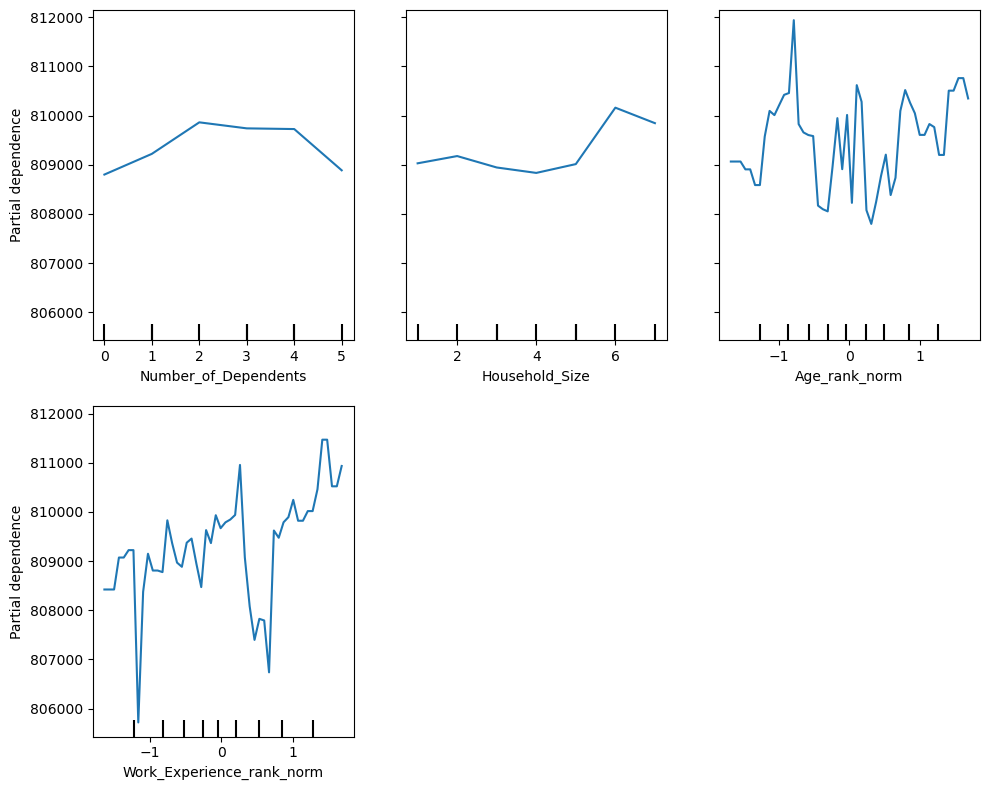

In [10]:
features = ["Number_of_Dependents", "Household_Size", 'Age_rank_norm', 'Work_Experience_rank_norm']
fig, ax = plt.subplots(figsize=(10, 8))
PartialDependenceDisplay.from_estimator(xgb, X_train, features, grid_resolution=50, ax=ax)
plt.tight_layout()
plt.show()